In [5]:
import cv2, glob,os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
import skimage
from skimage.filters import sobel_h,sobel
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import get_custom_objects
%matplotlib inline

In [6]:
def kneecap_img_continuous_score(model, img, width, height):
    indices = {'normal': 3, 'moderate': 1, 'nes': 2, 'endstage': 0}
    reverse_index = {v:k for k,v in indices.items()}
    im = cv2.resize(img, (width, height))
    im_c=im.astype('float')/255
    im_c = np.expand_dims(im_c, axis = 0)
    p=model.predict(im_c)
    p=p.flatten()
    p=p.round(decimals=3)
#     tmp=p[0]
#     p[0]=p[3]
#     p[3]=tmp
    label = reverse_index[np.argmax(p)]    
    return label,p,max(p)


def sliding_window(image, stepSize, windowSize):
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])
                
def detect_edge(img):
    gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gr, (9, 9), 0)
    for (x, y, window) in sliding_window(blur.copy().T, stepSize=1, windowSize=(3,3)):
        blur[x][y] = (np.max(window) - np.min(window))
    color_im = cv2.cvtColor(blur, cv2.COLOR_GRAY2BGR)
    return color_im


def group_class(x):
    if x=='endstage' or x=='nes':
        return 'arthritis'
    elif x=='moderate' or x=='normal/slight':
        return 'no_arthritis'


In [7]:
import os 
for model_new in os.listdir('./model_logs'):
    if model_new == '.ipynb_checkpoints':
        pass
    else:
        print(model_new)

deep_cnn_krnl_08_09-50-0.74.h5
deep_cnn_krnl_08_09-19-0.67.h5
deep_cnn_krnl_08_09-23-0.71.h5
deep_cnn_krnl_08_09-43-0.75.h5
deep_cnn_krnl_08_09-25-0.75.h5
deep_cnn_krnl_08_09-87-0.74.h5
deep_cnn_krnl_08_09-58-0.76.h5
deep_cnn_krnl_08_09-76-0.75.h5
deep_cnn_krnl_08_09-27-0.73.h5
deep_cnn_krnl_08_09-55-0.75.h5
deep_cnn_krnl_08_09-65-0.78.h5
deep_cnn_krnl_08_09-15-0.63.h5
deep_cnn_krnl_08_09-10-0.57.h5
deep_cnn_krnl_08_09-86-0.74.h5
deep_cnn_krnl_08_09-81-0.73.h5
deep_cnn_krnl_08_09-40-0.76.h5
deep_cnn_krnl_08_09-80-0.75.h5
deep_cnn_krnl_08_09-01-0.45.h5
deep_cnn_krnl_08_09-53-0.74.h5
deep_cnn_krnl_08_09-71-0.73.h5
deep_cnn_krnl_08_09-33-0.75.h5
deep_cnn_krnl_08_09-85-0.77.h5
deep_cnn_krnl_08_09-41-0.75.h5
deep_cnn_krnl_08_09-88-0.72.h5
deep_cnn_krnl_08_09-16-0.65.h5
deep_cnn_krnl_08_09-13-0.63.h5
deep_cnn_krnl_08_09-20-0.68.h5
deep_cnn_krnl_08_09-75-0.76.h5
deep_cnn_krnl_08_09-11-0.49.h5
deep_cnn_krnl_08_09-74-0.72.h5
deep_cnn_krnl_08_09-17-0.69.h5
deep_cnn_krnl_08_09-82-0.72.h5
deep_cnn

In [9]:
labels = []
pred = []
names = []
High_score=[]
pred_score=[]
MOD_NES = ['moderate', 'nes']
NOR_MOD = ['normal', 'moderate']
NES_END = ['nes' , 'endstage']
dual_label_images = {
                     '4_right.jpg' : NOR_MOD,
                     '124_right.jpg' : NOR_MOD,
                     '99_right.jpg' : NOR_MOD,
                     '182_right.jpg' : NOR_MOD,
                     '526_right.jpg' : NES_END,
                     '540_right.jpg' : NES_END,
                     '563_left.jpg' : NOR_MOD,
                     '532_right.jpg' : NES_END,
                     '314_left.jpg' : MOD_NES,
                    '312_left.jpg' : NOR_MOD,
                    '741_left.jpg' : NOR_MOD,
                    '74_left.jpg' : MOD_NES,
                    '93_right.jpg' : MOD_NES
                         }

model = load_model('./model_logs/deep_cnn_krnl_08_09-45-0.77.h5')
for f in glob.glob('./Dataset/super_final_BR_35_train_val_IB_used/buff_ratio_35_test/*'):
    l = f.split('/')[len(f.split('/')) -1]
    for ff in glob.glob(f + '/*'):
        name = ff.split('/')[len(ff.split('/')) -1]
        print(name)
        img = cv2.imread(ff)
#         img = detect_edge(img)

        x,x_score,max_score = kneecap_img_continuous_score(model,img,290,290)
        

        ll = l
        if name in dual_label_images.keys() and x in dual_label_images[name]:         
            if l in dual_label_images[name]:
                ll = x
                
        if x=='normal':
            x='normal/slight'
#         if l=='normal':
#             l='normal/slight'
        if ll=='normal':
            ll='normal/slight'
            
#         if x!=ll:
        print('Image : ' + name  + ' | Actual_label : ' + ll + ' | Predicted_label : ' + x + ' | Predicted_score : ' + str(x_score) + ' | Highest_score : ' + str(max_score))
            
        labels.append(ll)
        pred.append(x)
        names.append(name)
        High_score.append(max_score)
        pred_score.append(x_score)
d={'Image':names,'Actual_label':labels,'Predicted_label':pred,'Predicted_score':pred_score,'Highest_score':High_score}
df=pd.DataFrame(d)

312_left.jpg
Image : 312_left.jpg | Actual_label : moderate | Predicted_label : moderate | Predicted_score : [0.    0.945 0.05  0.005] | Highest_score : 0.945
752_left.jpg
Image : 752_left.jpg | Actual_label : moderate | Predicted_label : moderate | Predicted_score : [0.    0.928 0.013 0.059] | Highest_score : 0.928
363_right.jpg
Image : 363_right.jpg | Actual_label : moderate | Predicted_label : moderate | Predicted_score : [0.003 0.801 0.142 0.054] | Highest_score : 0.801
796_right.jpg
Image : 796_right.jpg | Actual_label : moderate | Predicted_label : moderate | Predicted_score : [0.    0.949 0.016 0.035] | Highest_score : 0.949
547_right.jpg
Image : 547_right.jpg | Actual_label : moderate | Predicted_label : moderate | Predicted_score : [0.    0.651 0.016 0.333] | Highest_score : 0.651
544_right.jpg
Image : 544_right.jpg | Actual_label : moderate | Predicted_label : moderate | Predicted_score : [0.    0.612 0.001 0.387] | Highest_score : 0.612
57_right.jpg
Image : 57_right.jpg | Ac

In [12]:
High_score=[]
acc_list = []
bacc_list = []
models = []
MOD_NES = ['moderate', 'nes']
NOR_MOD = ['normal', 'moderate']
NES_END = ['nes' , 'endstage']
dual_label_images = {
                     '4_right.jpg' : NOR_MOD,
                     '124_right.jpg' : NOR_MOD,
                     '99_right.jpg' : NOR_MOD,
                     '182_right.jpg' : NOR_MOD,
                     '526_right.jpg' : NES_END,
                     '540_right.jpg' : NES_END,
                     '563_left.jpg' : NOR_MOD,
                     '532_right.jpg' : NES_END,
                     '314_left.jpg' : MOD_NES,
                    '312_left.jpg' : NOR_MOD,
                    '741_left.jpg' : NOR_MOD,
                    '74_left.jpg' : MOD_NES,
                    '93_right.jpg' : MOD_NES
                         }
                         
for model_new in os.listdir('./model_logs'):
    if model_new == '.ipynb_checkpoints':
        pass
    else:
        model = load_model('./model_logs'+ '/' + model_new
#                            ,custom_objects={'kernel_new' : kernel_new}
                          )
    print(model_new,'is  loaded')
    labels = []
    pred = []
    names = []
    for f in glob.glob('./Dataset/super_final_BR_35_train_val_IB_used/buff_ratio_35_test/*'):
        l = f.split('/')[len(f.split('/')) -1]
        for ff in glob.glob(f + '/*'):
            
            name = ff.split('/')[len(ff.split('/')) -1]
            img = cv2.imread(ff)
            x,x_score,max_score = kneecap_img_continuous_score(model,img,290,290)

            ll = l
            if name in dual_label_images.keys() and x in dual_label_images[name]:         
                if l in dual_label_images[name]:
                    ll = x

            if x=='normal':
                x='normal/slight'
            if ll=='normal':
                ll='normal/slight'
            labels.append(ll)
            pred.append(x)
            names.append(name)
            High_score.append(max_score)
    acc=accuracy_score(pred, labels)
    acc
    bin_labels = list(map(lambda x : group_class(x), labels))
    bin_y_pred = list(map(lambda x : group_class(x), pred))
    bcf=confusion_matrix(bin_labels,bin_y_pred, labels=['arthritis', 'no_arthritis'])
    bacc= accuracy_score(bin_y_pred, bin_labels)
    bacc
    models.append(model_new)
    acc_list.append(acc)
    bacc_list.append(bacc)
    print('Multiclass =', acc ,'and Binary =',bacc)
#     print('Binary=', bacc)
data ={'Models':models,'Multiclass_Accuracy':acc_list,'Binary_Accuracy':bacc_list}
dataframe=pd.DataFrame(data) 

deep_cnn_krnl_08_09-50-0.74.h5 is  loaded
Multiclass = 0.7976190476190477 and Binary = 0.9166666666666666
deep_cnn_krnl_08_09-19-0.67.h5 is  loaded
Multiclass = 0.7023809523809523 and Binary = 0.8928571428571429
deep_cnn_krnl_08_09-23-0.71.h5 is  loaded
Multiclass = 0.75 and Binary = 0.8809523809523809
deep_cnn_krnl_08_09-43-0.75.h5 is  loaded
Multiclass = 0.8452380952380952 and Binary = 0.9404761904761905
deep_cnn_krnl_08_09-25-0.75.h5 is  loaded
Multiclass = 0.7261904761904762 and Binary = 0.8928571428571429
deep_cnn_krnl_08_09-87-0.74.h5 is  loaded
Multiclass = 0.7619047619047619 and Binary = 0.8809523809523809
deep_cnn_krnl_08_09-58-0.76.h5 is  loaded
Multiclass = 0.8214285714285714 and Binary = 0.9285714285714286
deep_cnn_krnl_08_09-76-0.75.h5 is  loaded
Multiclass = 0.6904761904761905 and Binary = 0.8571428571428571
deep_cnn_krnl_08_09-27-0.73.h5 is  loaded
Multiclass = 0.7857142857142857 and Binary = 0.9047619047619048
deep_cnn_krnl_08_09-55-0.75.h5 is  loaded
Multiclass = 0.714

In [14]:
pd.options.display.max_rows = 110
dataframe = dataframe.sort_values(['Multiclass_Accuracy','Binary_Accuracy'], ascending=False).reset_index()
dataframe

,index,Models,Multiclass_Accuracy,Binary_Accuracy
0,3,deep_cnn_krnl_08_09-43-0.75.h5,0.845238,0.940476
1,16,deep_cnn_krnl_08_09-80-0.75.h5,0.833333,0.928571
2,21,deep_cnn_krnl_08_09-85-0.77.h5,0.833333,0.916667
3,6,deep_cnn_krnl_08_09-58-0.76.h5,0.821429,0.928571
4,36,deep_cnn_krnl_08_09-46-0.74.h5,0.821429,0.928571
5,38,deep_cnn_krnl_08_09-66-0.77.h5,0.821429,0.916667
6,74,deep_cnn_krnl_08_09-45-0.77.h5,0.821429,0.916667
7,47,deep_cnn_krnl_08_09-39-0.74.h5,0.809524,0.928571
8,48,deep_cnn_krnl_08_09-42-0.74.h5,0.809524,0.928571
9,90,deep_cnn_krnl_08_09-57-0.75.h5,0.809524,0.916667


In [66]:
acc=accuracy_score(pred, labels)

In [67]:
acc

0.7649006622516556

In [68]:
bin_labels = list(map(lambda x : group_class(x), labels))
bin_y_pred = list(map(lambda x : group_class(x), pred))
bcf=confusion_matrix(bin_labels,bin_y_pred, labels=['arthritis', 'no_arthritis'])
bacc= accuracy_score(bin_y_pred, bin_labels)

In [69]:
bacc

0.8940397350993378

In [70]:
#df.to_csv('/home/vaibhavpawar/UPMC_Kneecap_project/dataset/final_train_val_test_kneecap/categorized_test_09_11/ratio_buff_35_train_pred.csv')

In [71]:
df.head()

,Image,Actual_label,Predicted_label,Predicted_score,Highest_score
0,330_right.jpg,normal/slight,moderate,"[0.0, 0.511, 0.002, 0.488]",0.511
1,775_right.jpg,normal/slight,normal/slight,"[0.0, 0.125, 0.0, 0.875]",0.875
2,576_right.jpg,normal/slight,normal/slight,"[0.0, 0.163, 0.0, 0.837]",0.837
3,637_left.jpg,normal/slight,normal/slight,"[0.0, 0.042, 0.0, 0.958]",0.958
4,630_left.jpg,normal/slight,normal/slight,"[0.0, 0.111, 0.0, 0.889]",0.889


In [72]:
#df=pd.read_csv('/home/vaibhavpawar/UPMC_Kneecap_project/dataset/final_train_val_test_kneecap/Groupby_avg_analysis.csv')

In [73]:
df=df.drop(columns='Image')

In [74]:
grp=df.groupby(['Actual_label', 'Predicted_label'])

In [75]:
grp.head()

,Actual_label,Predicted_label,Predicted_score,Highest_score
0,normal/slight,moderate,"[0.0, 0.511, 0.002, 0.488]",0.511
1,normal/slight,normal/slight,"[0.0, 0.125, 0.0, 0.875]",0.875
2,normal/slight,normal/slight,"[0.0, 0.163, 0.0, 0.837]",0.837
3,normal/slight,normal/slight,"[0.0, 0.042, 0.0, 0.958]",0.958
4,normal/slight,normal/slight,"[0.0, 0.111, 0.0, 0.889]",0.889
5,normal/slight,moderate,"[0.0, 0.649, 0.0, 0.351]",0.649
6,normal/slight,normal/slight,"[0.0, 0.037, 0.0, 0.963]",0.963
10,normal/slight,moderate,"[0.0, 0.634, 0.0, 0.366]",0.634
20,normal/slight,moderate,"[0.0, 0.808, 0.002, 0.19]",0.808
23,normal/slight,moderate,"[0.0, 0.69, 0.006, 0.303]",0.690


In [76]:
avg=grp.mean()['Highest_score'].reset_index()

In [77]:
avg

,Actual_label,Predicted_label,Highest_score
0,endstage,endstage,0.935844
1,endstage,moderate,0.887500
2,endstage,nes,0.818556
3,moderate,moderate,0.826213
4,moderate,nes,0.731000
5,moderate,normal/slight,0.664625
6,nes,endstage,0.740750
7,nes,moderate,0.802208
8,nes,nes,0.766778
9,normal/slight,moderate,0.699700


In [78]:
avg_cm=pd.crosstab(avg.Actual_label,avg.Predicted_label,values=avg.Highest_score,aggfunc=min)

In [79]:
avg_cm

Predicted_label,endstage,moderate,nes,normal/slight
Actual_label,,,,
endstage,0.935844,0.887500,0.818556,NaN
moderate,NaN,0.826213,0.731000,0.664625
nes,0.740750,0.802208,0.766778,NaN
normal/slight,NaN,0.699700,NaN,0.867978


In [80]:
avg_cm=avg_cm.fillna(0)

In [81]:
avg_cm

Predicted_label,endstage,moderate,nes,normal/slight
Actual_label,,,,
endstage,0.935844,0.887500,0.818556,0.000000
moderate,0.000000,0.826213,0.731000,0.664625
nes,0.740750,0.802208,0.766778,0.000000
normal/slight,0.000000,0.699700,0.000000,0.867978


In [82]:
avg_cm.index

Index(['endstage', 'moderate', 'nes', 'normal/slight'], dtype='object', name='Actual_label')

In [83]:
avg_cm.index=[3,1,2,0]

In [84]:
avg_cm

Predicted_label,endstage,moderate,nes,normal/slight
3,0.935844,0.887500,0.818556,0.000000
1,0.000000,0.826213,0.731000,0.664625
2,0.740750,0.802208,0.766778,0.000000
0,0.000000,0.699700,0.000000,0.867978


In [85]:
avg_cm=avg_cm.reset_index()

In [86]:
avg_cm

Predicted_label,index,endstage,moderate,nes,normal/slight
0,3,0.935844,0.887500,0.818556,0.000000
1,1,0.000000,0.826213,0.731000,0.664625
2,2,0.740750,0.802208,0.766778,0.000000
3,0,0.000000,0.699700,0.000000,0.867978


In [87]:
avg_cm=avg_cm.sort_values(['index'])

In [88]:
avg_cm=avg_cm[['normal/slight','moderate','nes','endstage']]

In [89]:
avg_cm=np.round(avg_cm,3)

In [90]:
avg_cm

Predicted_label,normal/slight,moderate,nes,endstage
3,0.868,0.700,0.000,0.000
1,0.665,0.826,0.731,0.000
2,0.000,0.802,0.767,0.741
0,0.000,0.888,0.819,0.936


In [91]:
avg_cm.index=['Slight/None','Moderate','NES','Endstage']

In [92]:
avg_cm.columns=['Slight/None','Moderate','NES','Endstage']

In [93]:
avg_cm

,Slight/None,Moderate,NES,Endstage
Slight/None,0.868,0.700,0.000,0.000
Moderate,0.665,0.826,0.731,0.000
NES,0.000,0.802,0.767,0.741
Endstage,0.000,0.888,0.819,0.936


In [94]:
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
import seaborn as sn

def pretty_plot_confusion_matrix(df_cm,df_score=np.NaN,bin_cm=False, annot=True, cmap="Oranges", fmt='.2f', fz=13,
      lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)
    
    #df_score=df_cm.iloc[0:4,0:4]

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    
#     sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, linewidths=2, ax=ax1,cbar=False,
#                      linecolor='w')

#     for p in ax1.texts:
#         myTrans = p.get_transform()
#         offset = matplotlib.transforms.ScaledTranslation(0,-20, matplotlib.transforms.IdentityTransform())
#         p.set_transform(myTrans + offset)
    
    
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": 14}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)


    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    sarray_df = np.array( df_score.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        
        if bin_cm==True:
            txt_res = configcell_text_and_colors_bin(array_df,sarray_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)
        else:
            txt_res = configcell_text_and_colors(array_df,sarray_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])
        
        

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Confusion matrix')
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.tight_layout()  #set layout slim
    plt.show()
#


def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    
    
def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1



def configcell_text_and_colors(array_df,sarray_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    if lin<4 and col<4 :
        cell_sval = sarray_df[lin][col]
    
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=13)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = '#3D2B1F'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.6, 0.6, 0.6, 1.0]
#         if(col == ccl - 1) and (lin == ccl - 1):
#             carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = str(cell_val)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.1, 0.2, 0.3, 0.74]
        else:
            oText.set_color('r')
            
            
            
            
     #main cells
    if(col != (ccl - 1)) and (lin != (ccl - 1)):

        #text to ADD
        font_prop = fm.FontProperties(size=13)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%.2f'%(cell_sval)]
        lis_kwa = [text_kwargs]
#         dic = text_kwargs.copy(); dic['color'] = '#3D2B1F'; lis_kwa.append(dic);
#         dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y+0.3), (oText._x, oText._y), (oText._x, oText._y-0.3)]
    
    
        if(col == lin):
            #set color of the textin the diagonal to white
            text_kwargs['color']='w'
            # set background color in the diagonal to blue
#             facecolors[posi] = [0.1, 0.2, 0.3, 0.74]
        else:
            text_kwargs['color']='r'
            
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)


    return text_add, text_del



def configcell_text_and_colors_bin(array_df,sarray_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    if lin<2 and col<2 :
        cell_sval = sarray_df[lin][col]
    
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=13)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = '#3D2B1F'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.6, 0.6, 0.6, 1.0]
#         if(col == ccl - 1) and (lin == ccl - 1):
#             carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = str(cell_val)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.1, 0.2, 0.3, 0.74]
        else:
            oText.set_color('r')
            
            
            
            
     #main cells
    if(col != (ccl - 1)) and (lin != (ccl - 1)):

        #text to ADD
        font_prop = fm.FontProperties(size=13)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%.2f'%(cell_sval)]
        lis_kwa = [text_kwargs]
#         dic = text_kwargs.copy(); dic['color'] = '#3D2B1F'; lis_kwa.append(dic);
#         dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y+0.3), (oText._x, oText._y), (oText._x, oText._y-0.3)]
    
    
        if(col == lin):
            #set color of the textin the diagonal to white
            text_kwargs['color']='w'
            # set background color in the diagonal to blue
#             facecolors[posi] = [0.1, 0.2, 0.3, 0.74]
        else:
            text_kwargs['color']='r'
            
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)


    return text_add, text_del












def plot_confusion_matrix_from_data(y_test,df_score,predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions,labels=['normal/slight','moderate','nes','endstage'])
    cmap = 'BuPu';
    fz = 11;
    figsize=[9,9];
    show_null_values = 2
    df_cm = DataFrame(confm, index=columns, columns=columns)
    pretty_plot_confusion_matrix(df_cm,df_score,fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)
    
    
def plot_bin_confusion_matrix_from_data(y_test,df_score, predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions,labels=['no_arthritis','arthritis'])
    cmap = 'BuPu';
    fz = 11;
    figsize=[9,9];
    show_null_values = 2
    df_cm = DataFrame(confm, index=columns, columns=columns)
    pretty_plot_confusion_matrix(df_cm,df_score,bin_cm=True,fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)


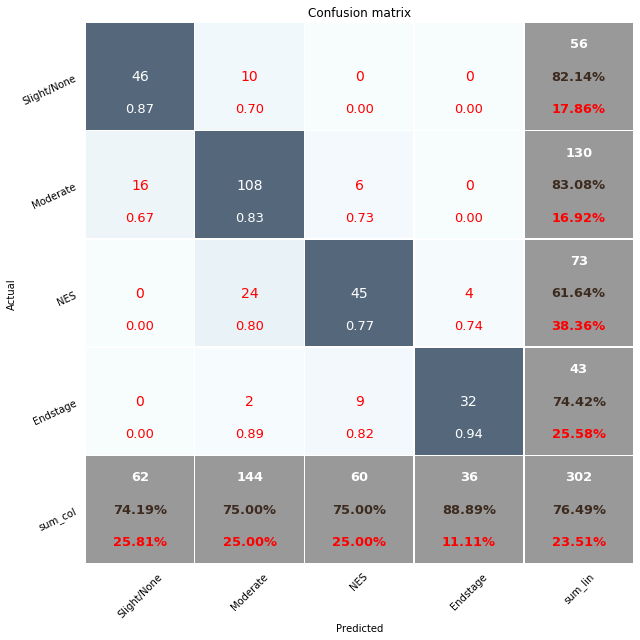

In [95]:
plot_confusion_matrix_from_data(labels,avg_cm,pred,columns=['Slight/None','Moderate','NES','Endstage'],pred_val_axis='x')

In [43]:
bin_labels = list(map(lambda x : group_class(x), labels))
bin_y_pred = list(map(lambda x : group_class(x), pred))
bcf=confusion_matrix(bin_labels,bin_y_pred, labels=['arthritis', 'no_arthritis'])
bacc= accuracy_score(bin_y_pred, bin_labels)

In [44]:
df['bin_label']=list(map(lambda x : group_class(x), df['Actual_label']))
df['bin_pred']=list(map(lambda x : group_class(x), df['Predicted_label']))

In [45]:
df.head()

,Actual_label,Predicted_label,Predicted_score,Highest_score,bin_label,bin_pred
0,normal/slight,normal/slight,"[0.0, 0.083, 0.002, 0.915]",0.915,no_arthritis,no_arthritis
1,normal/slight,normal/slight,"[0.0, 0.481, 0.001, 0.518]",0.518,no_arthritis,no_arthritis
2,normal/slight,normal/slight,"[0.0, 0.14, 0.0, 0.86]",0.860,no_arthritis,no_arthritis
3,normal/slight,normal/slight,"[0.0, 0.038, 0.0, 0.962]",0.962,no_arthritis,no_arthritis
4,moderate,moderate,"[0.0, 0.628, 0.0, 0.372]",0.628,no_arthritis,no_arthritis


In [46]:
grp_bin=df.groupby(['bin_label', 'bin_pred'])

In [47]:
grp_bin.head()

,Actual_label,Predicted_label,Predicted_score,Highest_score,bin_label,bin_pred
0,normal/slight,normal/slight,"[0.0, 0.083, 0.002, 0.915]",0.915,no_arthritis,no_arthritis
1,normal/slight,normal/slight,"[0.0, 0.481, 0.001, 0.518]",0.518,no_arthritis,no_arthritis
2,normal/slight,normal/slight,"[0.0, 0.14, 0.0, 0.86]",0.860,no_arthritis,no_arthritis
3,normal/slight,normal/slight,"[0.0, 0.038, 0.0, 0.962]",0.962,no_arthritis,no_arthritis
4,moderate,moderate,"[0.0, 0.628, 0.0, 0.372]",0.628,no_arthritis,no_arthritis
17,endstage,endstage,"[0.906, 0.0, 0.094, 0.0]",0.906,arthritis,arthritis
18,endstage,endstage,"[0.979, 0.001, 0.02, 0.0]",0.979,arthritis,arthritis
19,nes,nes,"[0.004, 0.154, 0.842, 0.0]",0.842,arthritis,arthritis
20,endstage,endstage,"[0.977, 0.0, 0.023, 0.0]",0.977,arthritis,arthritis
21,endstage,endstage,"[0.602, 0.0, 0.398, 0.0]",0.602,arthritis,arthritis


In [48]:
avg_bin=grp_bin.mean()['Highest_score'].reset_index()

In [49]:
avg_bin

,bin_label,bin_pred,Highest_score
0,arthritis,arthritis,0.811840
1,arthritis,no_arthritis,0.652000
2,no_arthritis,arthritis,0.801000
3,no_arthritis,no_arthritis,0.839655


In [50]:
avg_bin_cm=pd.crosstab(avg_bin.bin_label,avg_bin.bin_pred,values=avg_bin.Highest_score,aggfunc=min)

In [51]:
avg_bin_cm

bin_pred,arthritis,no_arthritis
bin_label,,
arthritis,0.81184,0.652000
no_arthritis,0.80100,0.839655


In [52]:
avg_bin_cm.index

Index(['arthritis', 'no_arthritis'], dtype='object', name='bin_label')

In [53]:
avg_bin_cm.index=[1,0]

In [54]:
avg_bin_cm

bin_pred,arthritis,no_arthritis
1,0.81184,0.652000
0,0.80100,0.839655


In [55]:
avg_bin_cm=avg_bin_cm.reset_index()

In [56]:
avg_bin_cm

bin_pred,index,arthritis,no_arthritis
0,1,0.81184,0.652000
1,0,0.80100,0.839655


In [57]:
avg_bin_cm=avg_bin_cm.sort_values(['index'])

In [58]:
avg_bin_cm=avg_bin_cm[['no_arthritis','arthritis']]

In [59]:
avg_bin_cm=np.round(avg_bin_cm,3)

In [60]:
avg_bin_cm

bin_pred,no_arthritis,arthritis
1,0.840,0.801
0,0.652,0.812


In [61]:
avg_bin_cm.index=['no_arthritis','arthritis']

In [62]:
avg_bin_cm.columns=['no_arthritis','arthritis']

In [63]:
avg_bin_cm

,no_arthritis,arthritis
no_arthritis,0.840,0.801
arthritis,0.652,0.812


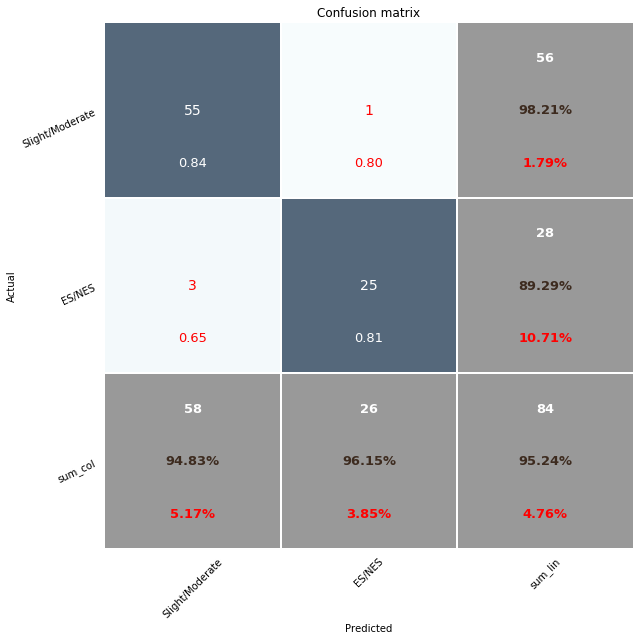

In [64]:
plot_bin_confusion_matrix_from_data(bin_labels,avg_bin_cm,bin_y_pred,columns=['Slight/Moderate','ES/NES'],pred_val_axis='x')